## **Proyecto:** Análisis de la Cesta de compra para el comercio minorista
### **Autor:** Andrea Juárez- María Gómez - Natia Lombardo
### **Fecha:** 02/09/22 

****

## **1. Introducción**

### **1.1 Objetivo** 

Las técnicas de ML implementadas buscan brindar información a los comerciantes en cuanto a las asociaciones observadas en las ventas de productos, así como en las reglas que operan para la rotación de los mismos.

### **1.2 Alcance** 

- Análisis de los datos : limpieza y adecuación de los datos (EDA)
- Se aplica el modelo APRIORI al dataset donde se verifican los valores del Soporte y la Confianza
- Se realiza Dashboard para desplegar el resultado del Análisis usando la herramienta Streamlit
- Se realiza el despliegue usando las herramienta Git Hub y Heroku




### **1.3 Resúmen** 

Trabajamos con un conjunto de datos de un cadena de jugeterias minorista ubicadas en Europa; este conjunto contiene los datos transaccionales de las operaciones de ventas ocurridas en el período de tiempo 2010 - 2011. 
El minorista utilizará el resultado para crecer en su negocio y brindará sugerencias para la implementacion de campañas de marketing y promocion de sus artículos, con esta herramienta se busca aumentar las ventas y mejorar la experiencia del cliente. Resolveremos este problema con el uso del tipo de reglas de asociación de técnica de aprendizaje no supervisado que verifica la dependencia de un elemento de datos en otro elemento de datos.

### **1.4 La Técnica**
La regla de asociación se usa más cuando se planea crear una asociación en diferentes objetos en un conjunto. Encuentra patrones frecuentes en una base de datos de transacciones. Puede mostrar qué artículos compran juntos los clientes con frecuencia y permite que el minorista identifique las relaciones entre los artículos.

Un ejemplo de reglas de asociación
Suponga que hay 100 clientes, 10 de ellos compraron Autos de colección, 9 compraron Pistas de Carreras y 8 compraron ambos.

compró Autos de colección => compró Pistas de Carreras

Soporte = P (Pistas de Carreras y Autos de colección) = 8/100 = 0,08

Confianza = soporte/P(Pistas de Carreras) = 0,08/0,09 = 0,89

LIFT = confianza/P (Autos de colección) = 0.89/0.10 = 8.9

*Este es un simple ejemplo en la práctica, una regla necesita el respaldo de varios cientos de transacciones antes de que pueda considerarse estadísticamente significativa, y los conjuntos de datos suelen contener miles o millones de transacciones*

Nombre de la lista: retaildata

Formato de archivo: . xlsx

Número de observaciones: 522065

Número de atributos: 7

### **1.5 Diccionario de Datos**
- BillNo: número de 6 dígitos asignado a cada transacción. Nominal.  
- Itemname: Nombre del producto. Nominal.  
- Quantity:Las cantidades de cada producto por transacción. Numérico.  
- Date: El día y la hora en que se generó cada transacción. Numérico.  
- Price: precio del producto. Numérico.  
- CustomerID: número de 5 dígitos asignado a cada cliente. Nominal.  
- Country: Nombre del país donde reside cada cliente. Nominal.  




### **1.6 Metodología a seguir**

- Carga de librerias y paquetes
- EDA del Dataset
- Aplicacion modelo Apriori 
- Deploy del modelo mediante GitHub a Heroku
- Despliegue del reporte mediante un Dashboard realizado en Streamlit

## **2. Carga de librerías y paquetes**

In [58]:
#!pip install mlxtend
#!pip install pandas

### **2.1 Librerías y paquetes**
Importamos las librerías y paquetes mas importantes entre ellos el ml extender, para encontrar patrones sin puntos

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

from plotly.offline import plot, iplot, init_notebook_mode
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import pairwise_distances

from funpymodeling.exploratory import freq_tbl
from plotly.offline import plot, iplot, init_notebook_mode

In [2]:
dataset=pd.read_csv('../data/raw/Assignment-1_Data.csv',sep=';')

/tmp/ipykernel_246602/1018422448.py:1: DtypeWarning:

Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.




### **3. EDA del Dataset**

In [3]:
dataset.head()

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,01.12.2010 08:26,"2,55",17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,01.12.2010 08:26,"2,75",17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom


In [15]:
dataset.sample(5)

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
29269,538849,CHRISTMAS TREE STAR DECORATION,36,14.12.2010 13:31,"0,42",14415.0,United Kingdom
140527,548894,BUNNY EGG GARLAND,2,04.04.2011 16:01,"0,83",NaN,United Kingdom
316231,565782,SET/20 RED RETROSPOT PAPER NAPKINS,7,06.09.2011 15:48,"0,85",12748.0,United Kingdom
516682,581219,VINTAGE DOILY DELUXE SEWING KIT,2,08.12.2011 09:28,"12,46",NaN,United Kingdom
381017,571082,IVORY PAPER CUP CAKE CASES,3,13.10.2011 15:25,"1,25",NaN,United Kingdom


In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522064 entries, 0 to 522063
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   BillNo      522064 non-null  object 
 1   Itemname    520609 non-null  object 
 2   Quantity    522064 non-null  int64  
 3   Date        522064 non-null  object 
 4   Price       522064 non-null  object 
 5   CustomerID  388023 non-null  float64
 6   Country     522064 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 27.9+ MB


In [17]:
dataset.describe()

,Quantity,CustomerID
count,522064.000000,388023.000000
mean,10.090435,15316.931710
std,161.110525,1721.846964
min,-9600.000000,12346.000000
25%,1.000000,13950.000000
50%,3.000000,15265.000000
75%,10.000000,16837.000000
max,80995.000000,18287.000000


Al analizar las variables numéricas nos aparecen las cantidades vendidas por cada producto, y las categóricas las analizaremos mas adelante.

Se encontraron un número importante de outliers en la variable Quantity, por lo cuál vamos a hacer una limpieza de los mismos.

In [18]:
df_clean = dataset.copy()

In [19]:
def plot_boxplot(df_clean, items2):
    df_clean.boxplot(column = [items2])
    plt.grid(False)
    plt.show()

In [20]:
# remuevo los outliers, defino la funcion llamada "outliers"
# IQR = Q3 - Q1

def outliers(df_clean, items2):
    Q1 = df_clean[items2].quantile(0.25)
    Q3 = df_clean[items2].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    ls = df_clean.index[(df_clean[items2] < lower_bound) | (df_clean[items2] > upper_bound) ]

    return ls

In [21]:
# creo la lista de indices

index_list = []

for feature in ['Quantity']:
    index_list.extend(outliers(df_clean, feature))

In [ ]:
index_list

In [23]:
# defino la funcion para remover los valores

def remove(df_clean, ls):
    ls = sorted(set(ls))
    df = df_clean.drop(ls)
    return df

In [24]:
df_cleaned = remove(df_clean, index_list)

In [25]:
df_cleaned

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,01.12.2010 08:26,"2,55",17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,01.12.2010 08:26,"2,75",17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,01.12.2010 08:26,"3,39",17850.0,United Kingdom
...,...,...,...,...,...,...,...
522059,581587,PACK OF 20 SPACEBOY NAPKINS,12,09.12.2011 12:50,"0,85",12680.0,France
522060,581587,CHILDREN'S APRON DOLLY GIRL,6,09.12.2011 12:50,"2,1",12680.0,France
522061,581587,CHILDRENS CUTLERY DOLLY GIRL,4,09.12.2011 12:50,"4,15",12680.0,France
522062,581587,CHILDRENS CUTLERY CIRCUS PARADE,4,09.12.2011 12:50,"4,15",12680.0,France


In [26]:
df_cleaned.shape

(466762, 7)

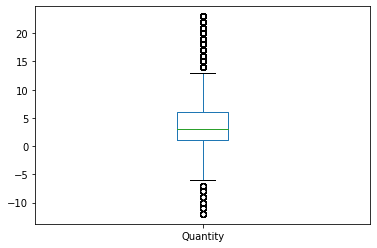

In [27]:
plot_boxplot(df_cleaned,'Quantity')

In [28]:
df_cleaned.describe()

,Quantity,CustomerID
count,466762.000000,335690.000000
mean,4.654348,15356.163565
std,4.433459,1714.637358
min,-12.000000,12347.000000
25%,1.000000,14022.000000
50%,3.000000,15311.000000
75%,6.000000,16891.000000
max,23.000000,18287.000000


Se realizó la limpieza de outliers sin embargo se debería realizar una mayor exploración de los datos para ver en que transacciones los valores son negativos.
Por este motivo continuamos con el dataset original y analizaremos la cadena de minoristas ubicada en Alemania a pedido del departamento de marketing para aplicar una promoción en la temporada de Navidad.

In [29]:
import funpymodeling

In [30]:
from funpymodeling import freq_tbl

In [31]:
freq_tbl(dataset['Itemname'])

,Itemname,frequency,percentage,cumulative_perc
0,WHITE HANGING HEART T-LIGHT HOLDER,2269,0.004346,0.004358
1,JUMBO BAG RED RETROSPOT,2087,0.003998,0.008367
2,REGENCY CAKESTAND 3 TIER,1930,0.003697,0.012074
3,PARTY BUNTING,1677,0.003212,0.015296
4,LUNCH BAG RED RETROSPOT,1570,0.003007,0.018311
...,...,...,...,...
4180,"FOOD COVER WITH BEADS , SET 2 SIZES",1,0.000002,0.999992
4181,POLYESTER FILLER PAD 60x40cm,1,0.000002,0.999994
4182,damages/credits from ASOS.,1,0.000002,0.999996
4183,samples,1,0.000002,0.999998


Lo primero que encontramos en el Dataset es que los portaluces colgantes son el producto mas vendido, con una frecuencia total de 2269 observaciones.

In [32]:
# buscamos la cantidad de na en el dataset
dataset.isna().sum()

BillNo             0
Itemname        1455
Quantity           0
Date               0
Price              0
CustomerID    134041
Country            0
dtype: int64

Tenemos 1455 na en la descripción del producto y 134041 na en los CustomerId, al ser un dataset grande eliminaremos estas observaciones, también removeremos de la descripción los espacios, y convertiremos el número de factura en str

In [33]:
# Limpiamos los datos

dataset['Itemname'] = dataset['Itemname'].str.strip() # aca estamos removiendo los espacios
dataset.dropna(axis=0, subset=['BillNo'], inplace=True) # elimino los na en las boletas
dataset.dropna(axis=0, subset=['CustomerID'], inplace=True) # elimino los na en los id de los clientes 
dataset['BillNo'] = dataset['BillNo']. astype('str') # convertimos el numero de factura en string
dataset = dataset[~dataset['BillNo'].str.contains('C')] # removemos las posibles transacciones realizadas a credito
dataset['Date'] = dataset['Date'].astype('datetime64')

dataset.head()


,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,"2,55",17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,2010-01-12 08:26:00,"3,39",17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,"2,75",17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,"3,39",17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,"3,39",17850.0,United Kingdom


In [34]:
dataset['Country'].value_counts()

United Kingdom          354345
Germany                   9042
France                    8342
Spain                     2485
Netherlands               2363
Belgium                   2031
Switzerland               1842
Portugal                  1462
Australia                 1185
Norway                    1072
Italy                      758
Sweden                     451
Austria                    398
Poland                     330
Japan                      321
Israel                     248
Unspecified                244
Singapore                  222
Iceland                    182
USA                        179
Greece                     145
Malta                      112
United Arab Emirates        68
RSA                         58
Lebanon                     45
Lithuania                   35
Brazil                      32
Bahrain                     17
Saudi Arabia                 9
Name: Country, dtype: int64

In [35]:
freq_tbl(dataset['Country'])

,Country,frequency,percentage,cumulative_perc
0,United Kingdom,354345,0.913206,0.913206
1,Germany,9042,0.023303,0.936509
2,France,8342,0.021499,0.958008
3,Spain,2485,0.006404,0.964412
4,Netherlands,2363,0.006090,0.970502
5,Belgium,2031,0.005234,0.975736
6,Switzerland,1842,0.004747,0.980483
7,Portugal,1462,0.003768,0.984251
8,Australia,1185,0.003054,0.987305
9,Norway,1072,0.002763,0.990068


Lo primero que observamos es que United Kingdom posee el 91% de los datos del dataset, sin embargo el pais objetivo para el análisis es Alemania, por lo explicado anteriormente.

In [36]:
# vamos a ver como se comportan las ventas según mes, o dia
def split_date(data):
    data['Date']=pd.to_datetime(data['Date'])
    data['Year']=data.Date.dt.year
    data['Month']=data.Date.dt.month
    data['Day']=data.Date.dt.day

In [37]:
dataset_min = dataset.copy()

In [86]:
#Spliting our date data into day ,month and year
split_date(dataset_min)
#check how now our data looks like
dataset_min.head()

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country,Year,Month,Day
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,"2,55",17850.0,United Kingdom,2010,1,12
1,536365,WHITE METAL LANTERN,6,2010-01-12 08:26:00,"3,39",17850.0,United Kingdom,2010,1,12
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,"2,75",17850.0,United Kingdom,2010,1,12
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,"3,39",17850.0,United Kingdom,2010,1,12
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,"3,39",17850.0,United Kingdom,2010,1,12


In [87]:
freq_tbl(dataset_min)

       BillNo  frequency  percentage  cumulative_perc
0      576339        542    0.001397         0.001397
1      579196        533    0.001374         0.002770
2      580727        529    0.001363         0.004134
3      578270        442    0.001139         0.005273
4      573576        435    0.001121         0.006394
...       ...        ...         ...              ...
18158  553847          1    0.000003         0.999990
18159  566184          1    0.000003         0.999992
18160  579006          1    0.000003         0.999995
18161  542234          1    0.000003         0.999997
18162  545331          1    0.000003         1.000000

[18163 rows x 4 columns]

----------------------------------------------------------------

                                Itemname  frequency  percentage  \
0     WHITE HANGING HEART T-LIGHT HOLDER       1976    0.005092   
1               REGENCY CAKESTAND 3 TIER       1643    0.004234   
2                JUMBO BAG RED RETROSPOT       1591    0.0

In [88]:
dataset_min['Itemname'].value_counts()

WHITE HANGING HEART T-LIGHT HOLDER    1976
REGENCY CAKESTAND 3 TIER              1643
JUMBO BAG RED RETROSPOT               1591
ASSORTED COLOUR BIRD ORNAMENT         1391
PARTY BUNTING                         1369
                                      ... 
OCEAN STRIPE HAMMOCK                     1
PAINTED HEART WREATH WITH BELL           1
WEEKEND BAG VINTAGE ROSE PAISLEY         1
WRAP  PINK FLOCK                         1
PAPER CRAFT , LITTLE BIRDIE              1
Name: Itemname, Length: 3846, dtype: int64

Una vez analizada la frecuencia, graficaremos el articulo mas vendido en las tiendas, cabe destacar que ningun producto llega al 1% de las ventas totales para el periodo en estudio, este es:

- WHITE HANGING HEART T-LIGHT HOLDER


In [89]:
dataset_min_Top = dataset_min[dataset_min['Itemname']== 'WHITE HANGING HEART T-LIGHT HOLDER']
dataset_min_Top.tail()

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country,Year,Month,Day
517571,581246,WHITE HANGING HEART T-LIGHT HOLDER,1,2011-08-12 10:59:00,"2,95",15453.0,United Kingdom,2011,8,12
517606,581253,WHITE HANGING HEART T-LIGHT HOLDER,2,2011-08-12 11:15:00,"2,95",16891.0,United Kingdom,2011,8,12
518122,581356,WHITE HANGING HEART T-LIGHT HOLDER,6,2011-08-12 12:28:00,"2,95",17830.0,United Kingdom,2011,8,12
520160,581452,WHITE HANGING HEART T-LIGHT HOLDER,32,2011-08-12 18:03:00,"2,55",17675.0,United Kingdom,2011,8,12
520379,581472,WHITE HANGING HEART T-LIGHT HOLDER,6,2011-08-12 19:55:00,"2,95",15796.0,United Kingdom,2011,8,12


In [90]:
dataset_min_Top.shape

(1976, 10)

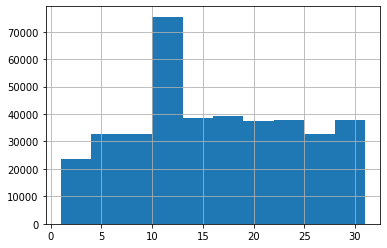

In [91]:
dataset_min['Day'].hist()
plt.show()

In [92]:
dataset_min.describe()

,Quantity,CustomerID,Year,Month,Day
count,388023.000000,388023.000000,388023.000000,388023.000000,388023.000000
mean,12.892140,15316.931710,2010.933795,6.940135,15.723908
std,182.605318,1721.846964,0.248640,3.331492,8.050063
min,1.000000,12346.000000,2010.000000,1.000000,1.000000
25%,2.000000,13950.000000,2011.000000,4.000000,10.000000
50%,5.000000,15265.000000,2011.000000,7.000000,15.000000
75%,12.000000,16837.000000,2011.000000,10.000000,22.000000
max,80995.000000,18287.000000,2011.000000,12.000000,31.000000


El año con mayor venta fue el 2011, ademas de podemos observar que el 75% de los datos se agrupa en este año, veamos la distribución de estos datos

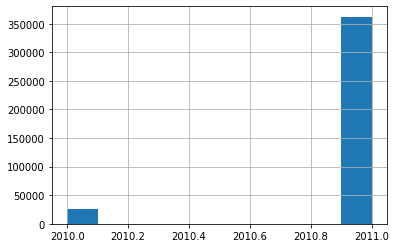

In [93]:
dataset_min['Year'].hist()
plt.show()

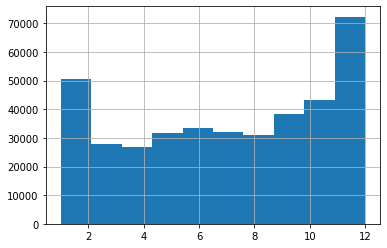

In [94]:
dataset_min['Month'].hist()
plt.show()

In [96]:
dataset.shape

(388023, 7)

In [97]:
dataset_min_germany = dataset_min[dataset['Country']== "Germany"]

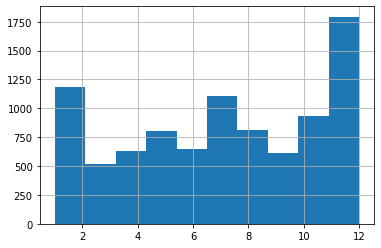

In [99]:
dataset_min_germany['Month'].hist()
plt.show()

In [44]:
from itertools import groupby


dataset_germany = (dataset[dataset['Country']== "Germany"].groupby(['BillNo', 'Itemname'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('BillNo'))

In [ ]:
#sns.lineplot(data = dataset_min_germany, x='Day', y= 'Quantity', hue='Itemname', markers=True, dashes=False)
#plt.show()

In [45]:
dataset_germany.shape

(457, 1695)

In [46]:
dataset_germany.head()

Itemname,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE SKULLS,...,YULETIDE IMAGES GIFT WRAP SET,ZINC HEART T-LIGHT HOLDER,ZINC STAR T-LIGHT HOLDER,ZINC BOX SIGN HOME,ZINC FOLKART SLEIGH BELLS,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK
BillNo,,,,,,,,,,,,,,,,,,,,,
536527,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536840,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536861,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536967,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536983,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Se agrupa por factura o boleta para ver en función del listado de productos la frecuencia en cada transacción, en este sentido así como vemos los datos es como veríamos una cesta. Lo que nos importa es su aparación en cada carrito, entonces cuando el valor es cero, significa que ese producto no estaba en ese carrito y cuando es mayor o igual a 1 si. 

Vamos a definir una funcion que convertirá todos los cero o menores que cero a cero y si son mayores a 1 en 1, esto lo hacemos porque es lo que el algoritmo usa o espera como entrada.

In [60]:
def my_encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

dataset_germany_set = dataset_germany.applymap(my_encode_units)
dataset_germany_set.drop('POSTAGE', inplace=True, axis=1)

Ahora que ya tenemos el dataset con las características esperadas aplicaremos nuestro algoritmo por asociación

Reglas de Asociación - Algoritmo

- Paso 1. Se establecen los valores mínimos para el soporte y
la confianza
- Paso 2. Se toman todos los subconjuntos de transacciones
que tienen un soporte mayor al valor del soporte mínimo.
- Paso 3. Tomar todas las reglas de estos subconjuntos que
tengan una confianza mayor al valor de la confianza
mínima.
- Paso 4. Ordenar las reglas de forma decreciente en base al
valor del lift.


### **4. Análisis de la cesta para el mercado de Alemania, según el requerimiento.**

In [54]:
df = dataset_germany_set.copy()

In [55]:
df.describe()

Itemname,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE SKULLS,...,YULETIDE IMAGES GIFT WRAP SET,ZINC HEART T-LIGHT HOLDER,ZINC STAR T-LIGHT HOLDER,ZINC BOX SIGN HOME,ZINC FOLKART SLEIGH BELLS,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK
count,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,...,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000,457.000000
mean,0.024070,0.004376,0.002188,0.004376,0.021882,0.013129,0.008753,0.004376,0.008753,0.004376,...,0.002188,0.002188,0.002188,0.002188,0.004376,0.002188,0.002188,0.004376,0.004376,0.008753
std,0.153435,0.066082,0.046778,0.066082,0.146458,0.113952,0.093248,0.066082,0.093248,0.066082,...,0.046778,0.046778,0.046778,0.046778,0.066082,0.046778,0.046778,0.066082,0.066082,0.093248
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 457 entries, 536527 to 581578
Columns: 1694 entries, 10 COLOUR SPACEBOY PEN to ZINC WILLIE WINKIE  CANDLE STICK
dtypes: int64(1694)
memory usage: 5.9+ MB


In [62]:
#Generamos la frecuencia de los items
df_itemsset = apriori(df, min_support=0.07, use_colnames=True)

/home/trillo/.local/lib/python3.10/site-packages/mlxtend/frequent_patterns/fpcommon.py:111: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type



In [63]:
# Creamos las reglas de asociación
my_rules = association_rules(df_itemsset, metric='lift', min_threshold=1)

In [64]:
# Viasualizamos el top de las 10 reglas o normas de asociación

my_rules.head(100)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ROUND SNACK BOXES SET OF4 WOODLAND),(PLASTERS IN TIN WOODLAND ANIMALS),0.245077,0.137856,0.074398,0.303571,2.202098,0.040613,1.237951
1,(PLASTERS IN TIN WOODLAND ANIMALS),(ROUND SNACK BOXES SET OF4 WOODLAND),0.137856,0.245077,0.074398,0.539683,2.202098,0.040613,1.640006
2,(ROUND SNACK BOXES SET OF4 WOODLAND),(ROUND SNACK BOXES SET OF 4 FRUITS),0.245077,0.157549,0.131291,0.535714,3.400298,0.092679,1.814509
3,(ROUND SNACK BOXES SET OF 4 FRUITS),(ROUND SNACK BOXES SET OF4 WOODLAND),0.157549,0.245077,0.131291,0.833333,3.400298,0.092679,4.529540
4,(SPACEBOY LUNCH BOX),(ROUND SNACK BOXES SET OF4 WOODLAND),0.102845,0.245077,0.070022,0.680851,2.778116,0.044817,2.365427
5,(ROUND SNACK BOXES SET OF4 WOODLAND),(SPACEBOY LUNCH BOX),0.245077,0.102845,0.070022,0.285714,2.778116,0.044817,1.256018


Mientras mayor es el valor del soporte y la confianza, mayor o mas fuerte es la regla de asociación, analizaremos el primer resultado

In [65]:
my_rules.head(1)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ROUND SNACK BOXES SET OF4 WOODLAND),(PLASTERS IN TIN WOODLAND ANIMALS),0.245077,0.137856,0.074398,0.303571,2.202098,0.040613,1.237951


Observamos que cada vez que aparece en el carrito (PLASTERS IN TIN WOODLAND ANIMALS) o yesos en hojalata de animales también aparece un set de caja de snack de 4 woodland, esta asociación tiene un soporte de 7.4% lo que quiere decir que cada 100 carritos esto ocurrio al menos 7 veces, con una confianza de un 53%, estas asociaciones siempre tendrán diferentes niveles de confianza dependiendo el producto raíz o inicial. Veremos las veces por ejemplo de las 457 boletas que se compro este producto.

In [68]:
dataset_germany_set['PLASTERS IN TIN WOODLAND ANIMALS'].sum()

63

Visualizamos que se compró unas 63 veces de 457, es un 13% de las facturas. 

In [69]:
dataset_germany_set['ROUND SNACK BOXES SET OF4 WOODLAND'].sum()

112

Esto quiere decir que el 100% de las personas que compran el producto A compraron el producto B, lo que quiere decir que podemos recomendar a nuestros clientes que adquieran el producto A que compren el producto B, ahora veamos si solo queremos recomendar los que tienen un nivel de confianza superior al 0.3

In [70]:
my_rules[(my_rules['lift'] >= 3) & (my_rules['confidence'] >= 0.3)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(ROUND SNACK BOXES SET OF4 WOODLAND),(ROUND SNACK BOXES SET OF 4 FRUITS),0.245077,0.157549,0.131291,0.535714,3.400298,0.092679,1.814509
3,(ROUND SNACK BOXES SET OF 4 FRUITS),(ROUND SNACK BOXES SET OF4 WOODLAND),0.157549,0.245077,0.131291,0.833333,3.400298,0.092679,4.529540


De esta forma después de analizar las diferentes rutas o caminos que nos arrojó el algoritmo quedan solo dos, con una confianza de 0.83 o 0.53 respectivamente.

## **4. Discusión de resultados y conclusiones**

Los procesos o sistemas de recomendacion mas básicos y comunes toman los escenarios detallados y analizan lo que se conoce como canasta de mercado.

In [71]:
my_rules.dtypes

antecedents            object
consequents            object
antecedent support    float64
consequent support    float64
support               float64
confidence            float64
lift                  float64
leverage              float64
conviction            float64
dtype: object

In [51]:
my_rules.antecedents[0]

frozenset({'ROUND SNACK BOXES SET OF4 WOODLAND'})

In [52]:
type(my_rules.antecedents[0])

frozenset

In [53]:
str(my_rules.antecedents[0])

"frozenset({'ROUND SNACK BOXES SET OF4 WOODLAND'})"

In [57]:
import re

In [64]:
re.sub(r'\W+',' ',re.search('({(.*)})', str(my_rules.antecedents[0]))[0]).strip()

'ROUND SNACK BOXES SET OF4 WOODLAND'

Guardamos los resultados en csv que luego tomara nuestra app.py

In [ ]:
my_rules.to_csv('../data/raw/reglas_de_asociacion.csv')

In [ ]:
df_itemsset.to_csv('../data/raw/Dataset_itemsset.csv')

## **5. Fuente consultadas para el proyecto**
[1] Canal YouTube : Unfold Data Science (9 de Agosto 2022). *Market Basket Analysis In Python|How to implement market basket analysis in Python|apriori algorithm*, enlace https://www.youtube.com/watch?v=4QIWJVVWJdQ 

[2] DataSet, enlace http://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx

[3] Colab, enlace https://colab.research.google.com/drive/1Khnu5HD3DjRGB4cTcdEmGE7cCUm73BsU#scrollTo=zN7RVYlKgzic



*Este Proyecto forma parte de los requerimientos para obtener el certificado de Machine Learning Engineer* en el marco del BOOTCAMP dictado por 4Geek Academy en Uruguay, asupiciado por la Universidad Tecnológica del Centro y el Banco interamericano de Desarrollo.

El repositorio puede encontrarlo en el siguiente link: https://github.com/andreaj-it/FINAL-PROJECT

El sistema de recomendaciones puede encontrarlo en el siguiente link:  https://mle-final-proyect.herokuapp.com/